In [7]:
import fitsio
import matplotlib.pyplot as plt
import numpy as np

In [4]:
d = fitsio.read("fnames.fits")

In [5]:
d

array([('DES0000-0207_r5935p01_metadetect.fits', 'OPS/multiepoch/Y6A2_METADETECT/r5935/DES0000-0207/p01/metadetect', 'DES0000-0207'),
       ('DES0000-5914_r5935p01_metadetect.fits', 'OPS/multiepoch/Y6A2_METADETECT/r5935/DES0000-5914/p01/metadetect', 'DES0000-5914'),
       ('DES0001-0624_r5935p01_metadetect.fits', 'OPS/multiepoch/Y6A2_METADETECT/r5935/DES0001-0624/p01/metadetect', 'DES0001-0624'),
       ...,
       ('DES0134-0958_r5936p01_metadetect.fits', 'OPS/multiepoch/Y6A2_METADETECT/r5936/DES0134-0958/p01/metadetect', 'DES0134-0958'),
       ('DES0135-1207_r5936p01_metadetect.fits', 'OPS/multiepoch/Y6A2_METADETECT/r5936/DES0135-1207/p01/metadetect', 'DES0135-1207'),
       ('DES0135-2749_r5936p01_metadetect.fits', 'OPS/multiepoch/Y6A2_METADETECT/r5936/DES0135-2749/p01/metadetect', 'DES0135-2749')],
      dtype=[('FILENAME', '<U420'), ('PATH', '<U1000'), ('TILENAME', '<U80')])

In [21]:
d = fitsio.read("blinded_data/DES0000+0209_r5935p01_metadetect.fits")

In [22]:
model = "pgauss"

Text(0, 0.5, '$T/T_{PSF}$')

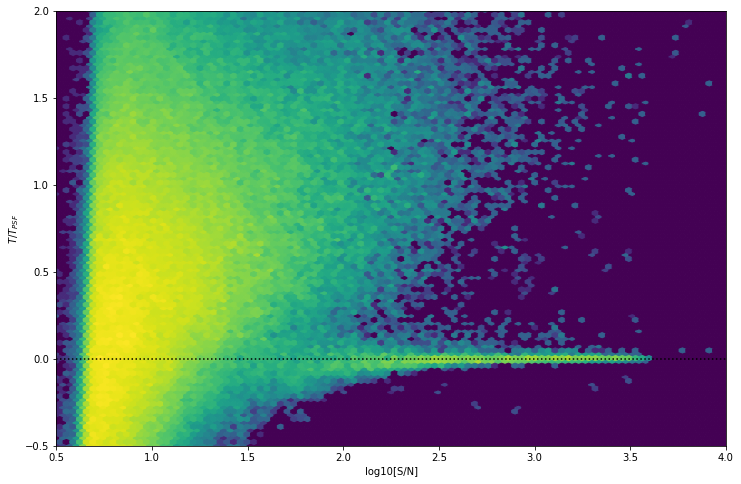

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

msk = d[model + "_T_flags"] == 0
axs.hexbin(np.log10(d[f"{model}_s2n"][msk]), d[f"{model}_T_ratio"][msk], extent=(0.5, 4, -0.5, 2), bins='log')
# axs.plot(np.log10(d[model + "_s2n"][msk]), d[model + "_T_ratio"][msk], '.')
axs.set_ylim(-0.5, 2)
axs.set_xlim(0.5, 4)
if "wmom" in model:
    axs.axhline(1, color='k', linestyle=":")
else:
    axs.axhline(0, color='k', linestyle=":")
axs.set_xlabel("log10[S/N]")
axs.set_ylabel("$T/T_{PSF}$")

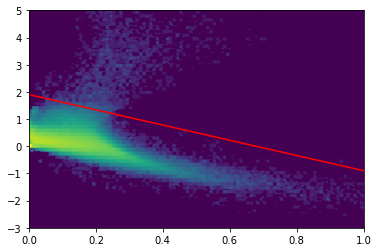

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=1)

msk = (d[model + "_flags"] == 0) & (d[model + "_s2n"] > 10) & (d[model + "_T_ratio"] > 0.5)
msk = np.ones(d.shape[0]).astype(bool)
axs.hexbin(d[f"{model}_T_err"][msk], d[f"{model}_T"][msk], extent=(0, 1, -3, 5), cmap="viridis", bins='log')
axs.set_xlim(0, 1)
axs.set_ylim(-3, 5)
# # axs.plot(np.log10(d[model + "_s2n"][msk]), d[model + "_T_ratio"][msk], '.')
# axs.set_ylim(-0.5, 2)
# axs.set_xlim(0.5, 4)
# if "wmom" in model:
#     axs.axhline(1, color='k', linestyle=":")
# else:
#     axs.axhline(0, color='k', linestyle=":")
# axs.set_xlabel("log10[S/N]")
# axs.set_ylabel("$T/T_{PSF}$")

x = np.linspace(0, 1, 200)
y = 1.9 - 2.8 * x
axs.plot(x, y, '-', color='r')